In [1]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-10 04:38:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.93MB/s    in 40s     

2021-07-10 04:39:14 (7.74 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



### Created by Pratama Azmi Atmajaya < X W Y Z W O R M >

In [204]:
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import shutil 
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from google.colab import files

print(f"Numpy : {np.__version__}")
print(f"pandas : {pd.__version__}")
print(f"tensorflow : {tf.__version__}")

Numpy : 1.19.5
pandas : 1.1.5
tensorflow : 2.5.0


In [3]:
def compressZip(src,dest):
  with zipfile.ZipFile(src) as zf:
    zf.extractall(
        dest, )
compressZip('rockpaperscissors.zip',"rockpaperscissors/")

In [4]:
Workdir = os.getcwd() + "/rockpaperscissors" + "/rockpaperscissors"
def mkdir(workdir, name):
  try:
    path = os.path.join(workdir,name)
    os.mkdir(path)
    return 1
  except : 
    pass
mkdir(Workdir,"validation")
mkdir(Workdir,"train")


1

In [5]:
print(Workdir)

/content/rockpaperscissors/rockpaperscissors


In [6]:
pathValidation = Workdir + "/validation"
pathTrain = Workdir + "/train"

def mkdirLabels(path,name):
  path = os.path.join(path,name)
  try:
    os.mkdir(path)
  except:
    pass
mkdirLabels(pathValidation,"rock")
mkdirLabels(pathValidation,"scissors")
mkdirLabels(pathValidation,"paper")

mkdirLabels(pathTrain,"rock")
mkdirLabels(pathTrain,"scissors")
mkdirLabels(pathTrain,"paper")

In [7]:
def splitData(workdir,location):
  path = os.path.join(workdir,location)
  return train_test_split(os.listdir(path), test_size=0.4, random_state = 5)

train_rock, test_rock = splitData(Workdir,"rock")
train_paper, test_paper = splitData(Workdir,"paper")
train_scissors, test_scissors = splitData(Workdir,"scissors")


In [8]:
path_rock = os.path.join(os.getcwd(), "rockpaperscissors/rockpaperscissors/rock")
destination_trainRock = os.path.join(os.getcwd(),"rockpaperscissors/rockpaperscissors/train/rock" )
destination_validationRock  = os.path.join(os.getcwd(),"rockpaperscissors/rockpaperscissors/validation/rock" )

path_paper = os.path.join(os.getcwd(), "rockpaperscissors/rockpaperscissors/paper")
destination_trainpaper = os.path.join(os.getcwd(),"rockpaperscissors/rockpaperscissors/train/paper" )
destination_validationpaper  = os.path.join(os.getcwd(),"rockpaperscissors/rockpaperscissors/validation/paper" )

path_scissors = os.path.join(os.getcwd(), "rockpaperscissors/rockpaperscissors/scissors")
destination_trainscissors = os.path.join(os.getcwd(),"rockpaperscissors/rockpaperscissors/train/scissors" )
destination_validationscissors  = os.path.join(os.getcwd(),"rockpaperscissors/rockpaperscissors/validation/scissors" )


def copytoTrainAndValidation(train,validation,dataPath,destinationTrain,destinationValidation):
  for i in train:
    shutil.copy(os.path.join(dataPath,i) , os.path.join(destinationTrain,i))
  print("training copied")

  for i in validation:
    shutil.copy(os.path.join(dataPath,i) , os.path.join(destinationValidation,i))
  
  print("validation copied")


copytoTrainAndValidation(train_rock, test_rock,path_rock,destination_trainRock,destination_validationRock )

copytoTrainAndValidation(train_paper, test_paper,path_paper,destination_trainpaper,destination_validationpaper )

copytoTrainAndValidation(train_scissors, test_scissors ,path_scissors,destination_trainscissors,destination_validationscissors )

training copied
validation copied
training copied
validation copied
training copied
validation copied


In [9]:
# Yoman
print("================== Training ==============")
print(f"total train_rock {len(os.listdir(destination_trainRock))} ")
print(f"total train_paper {len(os.listdir(destination_trainpaper))} ")
print(f"total train_scissors {len(os.listdir(destination_trainscissors))} ")

print("================== Validation ==============")
print(f'total validation_rock {len(os.listdir(destination_validationRock))}' )
print(f'total validation_paper {len(os.listdir(destination_validationpaper))}' )
print(f'total validation_scissors {len(os.listdir(destination_validationscissors))}' )


================== Training ==============
total train_rock 435 
total train_paper 427 
total train_scissors 450 
================== Validation ==============
total validation_rock 291
total validation_paper 285
total validation_scissors 300


Image Augmentation ./.

In [69]:
TRAIN_DIR = os.path.join(Workdir,"train")
VALIDATION_DIR = os.path.join(Workdir,"validation")
print(TRAIN_DIR)
train_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/ 255,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range=0.2,
    fill_mode="nearest",
    rotation_range=15

)

validation_datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/ 255,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range=0.2,
    fill_mode="nearest",
    rotation_range=15

)

training_generator = train_datagenerator.flow_from_directory(
    TRAIN_DIR,
    class_mode = "categorical",
    batch_size=64,
    target_size=(64,64)
)

validation_generator = validation_datagenerator.flow_from_directory(
    VALIDATION_DIR,
    class_mode = "categorical",
    batch_size=64,
    target_size=(64,64),shuffle=False
)

/content/rockpaperscissors/rockpaperscissors/train
Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [70]:
def initiateModel():
  model = tf.keras.models.Sequential([
                              tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu,input_shape=(64, 64, 3)),
                              tf.keras.layers.MaxPooling2D((2,2)),
                              tf.keras.layers.Conv2D(128,(3,3), activation=tf.nn.relu),
                              tf.keras.layers.MaxPooling2D((2,2)),
                              tf.keras.layers.Conv2D(256 , (5,5),activation=tf.nn.relu),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1024,activation=tf.nn.relu),
                              tf.keras.layers.Dropout(0.4),
                              tf.keras.layers.Dense(3,activation=tf.nn.softmax)

  ],name="primitif")

  METRICS = [
        tf.keras.metrics.TruePositives(name='tp'),
        tf.keras.metrics.FalsePositives(name='fp'),
        tf.keras.metrics.TrueNegatives(name='tn'),
        tf.keras.metrics.FalseNegatives(name='fn'), 
        tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),

  ]
  model.compile(optimizer=  tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.categorical_crossentropy,
                metrics = METRICS
                )
  return model

modelPrimitif = initiateModel()
modelPrimitif.summary()

Model: "primitif"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 256)       819456    
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              262

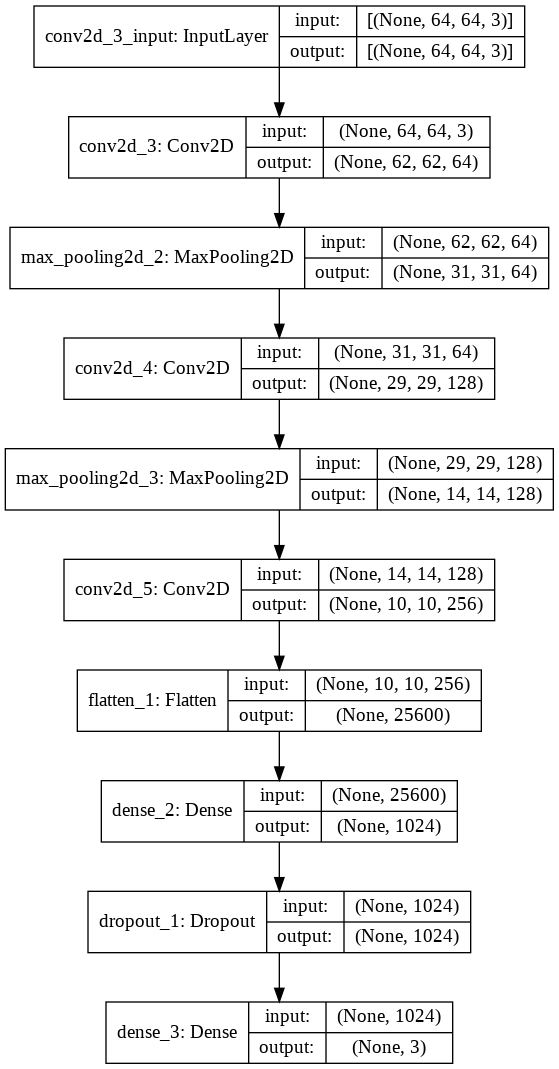

In [71]:
from tensorflow.keras.utils import plot_model
plot_model(modelPrimitif, show_shapes=True)

In [72]:
history = modelPrimitif.fit(
    training_generator,
    steps_per_epoch = training_generator.n // 64,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = validation_generator.n // 64
)

Epoch 1/20
20/20 [==============================] - 9s 372ms/step - loss: 1.3601 - tp: 69.0000 - fp: 134.0000 - tn: 2362.0000 - fn: 1179.0000 - accuracy: 0.3766 - precision: 0.3399 - recall: 0.0553 - auc: 0.5496 - val_loss: 1.0421 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 1663.0000 - val_fn: 832.0000 - val_accuracy: 0.4375 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6864
Epoch 2/20
20/20 [==============================] - 6s 322ms/step - loss: 0.8855 - tp: 500.0000 - fp: 248.0000 - tn: 2248.0000 - fn: 748.0000 - accuracy: 0.6106 - precision: 0.6684 - recall: 0.4006 - auc: 0.7923 - val_loss: 0.7169 - val_tp: 543.0000 - val_fp: 130.0000 - val_tn: 1534.0000 - val_fn: 289.0000 - val_accuracy: 0.7692 - val_precision: 0.8068 - val_recall: 0.6526 - val_auc: 0.8773
Epoch 3/20
20/20 [==============================] - 6s 326ms/step - loss: 0.5550 - tp: 957.0000 - fp: 198.0000 - tn: 2298.0000 - fn: 291.0000 - accuracy: 0.8021 - precision: 0.8286 - recall: 0.7668 - auc:

In [73]:
df = pd.DataFrame(history.history)
df['epochs'] = list(range(1,21) )
df.head()

,loss,tp,fp,tn,fn,accuracy,precision,recall,auc,val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,epochs
0,1.360144,69.0,134.0,2362.0,1179.0,0.376603,0.339901,0.055288,0.549562,1.042085,0.0,1.0,1663.0,832.0,0.437500,0.000000,0.000000,0.686404,1
1,0.885511,500.0,248.0,2248.0,748.0,0.610577,0.668449,0.400641,0.792312,0.716852,543.0,130.0,1534.0,289.0,0.769231,0.806835,0.652644,0.877298,2
2,0.555016,957.0,198.0,2298.0,291.0,0.802083,0.828571,0.766827,0.919695,0.419192,687.0,73.0,1591.0,145.0,0.878606,0.903947,0.825721,0.965274,3
3,0.349556,1070.0,132.0,2364.0,178.0,0.874199,0.890183,0.857372,0.967100,0.284822,734.0,78.0,1586.0,98.0,0.891827,0.903941,0.882212,0.977513,4
4,0.228893,1145.0,79.0,2417.0,103.0,0.925481,0.935458,0.917468,0.984288,0.245773,758.0,64.0,1600.0,74.0,0.913462,0.922141,0.911058,0.981477,5


In [201]:
fig = go.Figure()
fig.add_trace(go.Scatter( y = df["loss"], x = df["epochs"],mode="lines+markers",name="Train loss"))
fig.add_trace(go.Scatter( y = df["val_loss"], x = df["epochs"],mode="lines+markers",name="Validation loss"))
fig.layout.update(
    title=" Training Loss  vs Validation Accuracy "
)
fig.show()

In [188]:
## Train Loss and Accuracy
fig = go.Figure()
fig.add_trace(go.Scatter( y = df["accuracy"], x = df["epochs"],mode="lines+markers",name="Train Accuracy"))
fig.add_trace(go.Scatter( y = df["val_accuracy"], x = df["epochs"],mode="lines+markers",name="Validation Accuracy"))
fig.layout.update(
    title="Training Accuracy  vs Validation Accuracy "
)
fig.show()

In [187]:
fig = go.Figure()
fig.add_trace(go.Scatter( y = df["tp"], x = df["epochs"],mode="lines+markers",name="True Positive"))
fig.add_trace(go.Scatter( y = df["fn"], x = df["epochs"],mode="lines+markers",name="False Negative"))
fig.add_trace(go.Scatter( y = df["val_tp"], x = df["epochs"],mode="lines+markers",name="Validation True Positive"))
fig.add_trace(go.Scatter( y = df["val_fn"], x = df["epochs"],mode="lines+markers",name="Validation False Negative"))
fig.layout.update(
    title="True Positive Vs False Negative"
)
fig.show()

In [186]:
fig = go.Figure()
fig.add_trace(go.Scatter( y = df["tn"], x = df["epochs"],mode="lines+markers",name="True Negative"))
fig.add_trace(go.Scatter( y = df["fp"], x = df["epochs"],mode="lines+markers",name="False Positive"))
fig.add_trace(go.Scatter( y = df["val_tn"], x = df["epochs"],mode="lines+markers",name="Validation True Negative"))
fig.add_trace(go.Scatter( y = df["val_fp"], x = df["epochs"],mode="lines+markers",name="Validation False Positive"))
fig.layout.update(
    title="True Negative Vs False positive"
)
fig.show()

In [198]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=df["auc"], x=df["epochs"], fill='tozeroy', name="Auc Train"))
fig.add_trace(go.Scatter(y=df["val_auc"],x=df["epochs"],fill="tozeroy",name="Auc Validation"))
fig.layout.update(
    title="Auc Visualization"
)
fig.show()

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

y_true = validation_generator.labels
y_pred = np.argmax(modelPrimitif.predict(validation_generator),axis=1)


In [183]:
#Lets Visualize it , lol

matrix = confusion_matrix(y_true,y_pred)
annotations = go.Annotations()
x = ["Paper","rock","scissors"]
y = ["Paper","rock","scissors"]
for n, row in enumerate(matrix):
    for m, val in enumerate(row):
        annotations.append(go.Annotation(text=str(matrix[n][m]), x=x[m], y=y[n],
                                         xref='x1', yref='y1', showarrow=False))
        
matrix = pd.DataFrame(matrix,columns=["paper","rock","scissors"])
fig = go.Figure()
fig.add_traces(go.Heatmap(x = ["Paper","rock","scissors"],
                          y = ["Paper","rock","scissors"],
    z=matrix,colorscale=px.colors.sequential.Hot,))
print(annotations)
fig.layout.update(
    title = "Confusion Matrix",
    annotations = annotations
)
fig.show()

[{'text': '278', 'x': 'Paper', 'y': 'Paper', 'xref': 'x1', 'yref': 'y1', 'showarrow': False}, {'text': '4', 'x': 'rock', 'y': 'Paper', 'xref': 'x1', 'yref': 'y1', 'showarrow': False}, {'text': '3', 'x': 'scissors', 'y': 'Paper', 'xref': 'x1', 'yref': 'y1', 'showarrow': False}, {'text': '3', 'x': 'Paper', 'y': 'rock', 'xref': 'x1', 'yref': 'y1', 'showarrow': False}, {'text': '288', 'x': 'rock', 'y': 'rock', 'xref': 'x1', 'yref': 'y1', 'showarrow': False}, {'text': '0', 'x': 'scissors', 'y': 'rock', 'xref': 'x1', 'yref': 'y1', 'showarrow': False}, {'text': '1', 'x': 'Paper', 'y': 'scissors', 'xref': 'x1', 'yref': 'y1', 'showarrow': False}, {'text': '1', 'x': 'rock', 'y': 'scissors', 'xref': 'x1', 'yref': 'y1', 'showarrow': False}, {'text': '298', 'x': 'scissors', 'y': 'scissors', 'xref': 'x1', 'yref': 'y1', 'showarrow': False}]


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:68: DeprecationWarning:

plotly.graph_objs.Annotations is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:149: DeprecationWarning:

plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation




In [185]:
clr = classification_report(y_true,y_pred)
def plot_classification_report(clr):
  data = clr.split("\n")
  classes = []
  plot = []

  for line in data[2:(len(data)-3)]:
    info = line.split()
    if (info != []):
      if[info[0] != "accuracy"]:
        classes.append(info[0])
        plot_data = [float(dat) for dat in info[1 : 4]]
        plot.append(plot_data)

  plot = np.array(plot [: -1])

  x = ["precision","recall","f1score"]
  y = ["paper","rock","scissors"]
  annotation = []
  for n, row in enumerate(plot):
      for m, val in enumerate(row):

          annotation.append(go.layout.Annotation(text=str(plot[n][m]), x=x[m], y=y[n],
                                           showarrow=False))
  fig = go.Figure()
  plot = pd.DataFrame(plot,columns=["precision","recall","f1score"])

  fig.add_traces(go.Heatmap(x = ["precision","recall","f1score"],
                            y = ["paper","rock","scissors"],z = plot , 
                            colorscale = px.colors.sequential.Hot))

  fig.layout.update(
      title="Classification report",
      annotations = annotation
  )

  fig.show()
  return plot
plot_classification_report(clr)

,precision,recall,f1score
0,0.99,0.98,0.98
1,0.98,0.99,0.99
2,0.99,0.99,0.99


Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq (3).png

Kelas : Batu



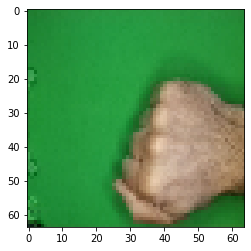

In [209]:
uploaded = files.upload()
import matplotlib.pyplot as plt
for filec in uploaded.keys():
    path = filec
    img = tf.keras.preprocessing.image.load_img(path, target_size=(64,64))
    imgplot = plt.imshow(img)
    x =  tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = np.argmax(modelPrimitif.predict(images),axis=1)
    
    if classes == 0:
       print('\nKelas : Kertas\n')
    elif classes == 1:
       print('\nKelas : Batu\n')
    else:
       print('\nKelas : Gunting\n')